# ML@NERSC 2024 Survey Analysis

This notebook contains the plotting code for the ML@NERSC 2024 survey results.

To get started, download the responses spreadsheet as a tab-separated file (TSV) and put it in this directory.

ML@NERSC 2024 responses: https://docs.google.com/spreadsheets/d/11kAePJIvJWABT8DYkYL1biStwiqlnbLMIuiTXbMxvyk

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def split_multi_response(x):
    """Splits a multiple checkbox answer column into single flattened Series"""
    x = x.dropna()
    return x.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

In [3]:
# Global settings
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.rcParams['font.size'] = 16.0

## Load the data

In [4]:
data = pd.read_csv('ML@NERSC User Survey 2024 (Responses) - Form Responses 1.tsv', sep='\t')

In [5]:
data.shape

(107, 44)

In [6]:
data.head()

,Timestamp,How do you rate your expertise in Machine Learning?,What science domains are you using ML for?,Any publications that you would like to share with us (Optional),Email (Optional),What frameworks/tools are you using?,Where do you run your ML models? [My own laptop or development box],Where do you run your ML models? [NERSC],Where do you run your ML models? [Other HPC center(s)],Where do you run your ML models? [University/Group cluster],...,What ML software installation setup do you use at NERSC (if relevant)?,How well does the ML software stack at NERSC satisfy your needs?,"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Installing/using software]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Application performance]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting interactive resources for development/testing]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Submitting jobs]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting jobs through the queues]",Are there any other aspects of running your ML workload at NERSC that you find challenging?,Do you have any other comments or suggestions to improve the suitability of NERSC resources for Machine Learning?
0,3/28/2024 13:29:21,7.0,"Computer Science, Earth and Environmental Science",NaN,NaN,"PyTorch, TensorFlow, Keras",NaN,Training,NaN,"Training, Inference",...,"NERSC modules (TensorFlow, PyTorch, Anaconda),...",7.0,6.0,No challenge or concern,Somewhat challenging,No challenge or concern,No challenge or concern,No challenge or concern,NaN,NaN
1,3/28/2024 13:30:25,4.0,"Astrophysics, Cosmology",NaN,NaN,"TensorFlow, JAX",NaN,"Training, Inference","Training, Inference","Training, Inference",...,NaN,4.0,4.0,Somewhat challenging,No challenge or concern,No challenge or concern,No challenge or concern,Highly challenging,NaN,NaN
2,3/28/2024 13:31:08,4.0,Earth and Environmental Science,NaN,NaN,TensorFlow,NaN,"Training, Inference",NaN,Training,...,"NERSC modules (TensorFlow, PyTorch, Anaconda),...",6.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,No challenge or concern,NaN,NaN
3,3/28/2024 13:32:28,4.0,Earth and Environmental Science,https://arxiv.org/abs/2306.08754 https://arxiv...,jerryL9@uci.edu,"TensorFlow, Keras",NaN,NaN,"Training, Inference",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I don't use NERSC at the moment, may switch in...","I don't use NERSC at the moment, may switch in..."
4,3/28/2024 13:34:04,6.0,"Biosciences, Chemistry, Earth and Environmenta...",NaN,NaN,"PyTorch, TensorFlow, JAX, Keras",Inference,"Training, Inference","Training, Inference",NaN,...,Build from source,3.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,No challenge or concern,NaN,NaN


In [7]:
# View all the questions (columns) by index, for reference
pd.Series(data.columns)

0                                             Timestamp
1     How do you rate your expertise in Machine Lear...
2            What science domains are you using ML for?
3     Any publications that you would like to share ...
4                                      Email (Optional)
5                  What frameworks/tools are you using?
6     Where do you run your ML models? [My own lapto...
7              Where do you run your ML models? [NERSC]
8     Where do you run your ML models? [Other HPC ce...
9     Where do you run your ML models? [University/G...
10             Where do you run your ML models? [Cloud]
11             Where do you run your ML models? [Other]
12      What hardware do you run your models on? [CPUs]
13      What hardware do you run your models on? [GPUs]
14      What hardware do you run your models on? [TPUs]
15     What hardware do you run your models on? [FPGAs]
16     What hardware do you run your models on? [Other]
17    If you answered "Other" on the above, or i

## How do you rate your experience in ML?

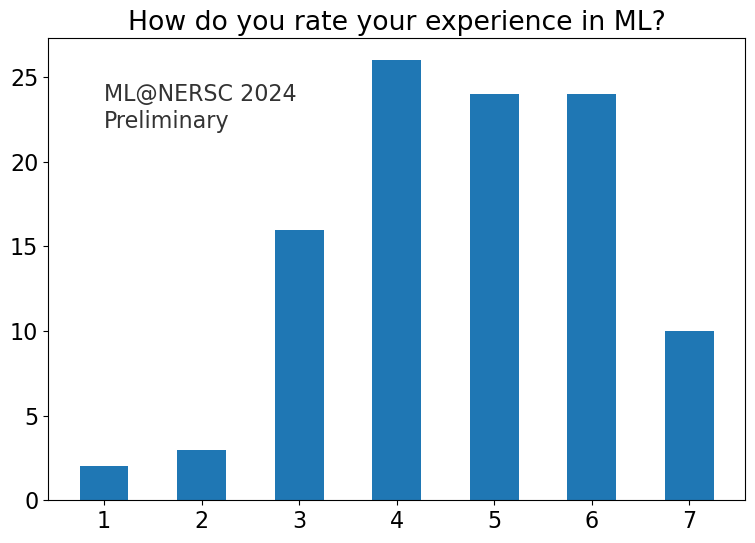

In [13]:
plt.figure()
plt.hist(data.iloc[:,1], bins=13, range=(0.75,7.25))
plt.title('How do you rate your experience in ML?')
plt.text(1, 22, 'ML@NERSC 2024\nPreliminary', alpha=0.8);

## What science domains are you using ML for?

In [14]:
# Select the appropriate column
responses = data.iloc[:,2]

# Split responses
domains = split_multi_response(responses)

# Get unique response counts
domain_counts = domains.value_counts(ascending=True)
domain_counts

What science domains are you using ML for?
Plasma physics and optics             1
Atmospheric Science                   1
plasma and accelerator physics        1
Materials                             1
Materials Research                    1
Materials Science                     1
                                      1
statistics                            1
Applied Physics                       1
Materials science                     1
Materials science and engineering     1
Networking                            1
Social Sciences                       2
Robotics                              2
materials science                     2
Medical                               4
Nuclear Physics                       5
Geosciences                           6
Fusion Energy Science                 7
Applied Mathematics                   7
Cosmology                            12
Engineering                          13
High Energy Physics                  17
Biosciences                          

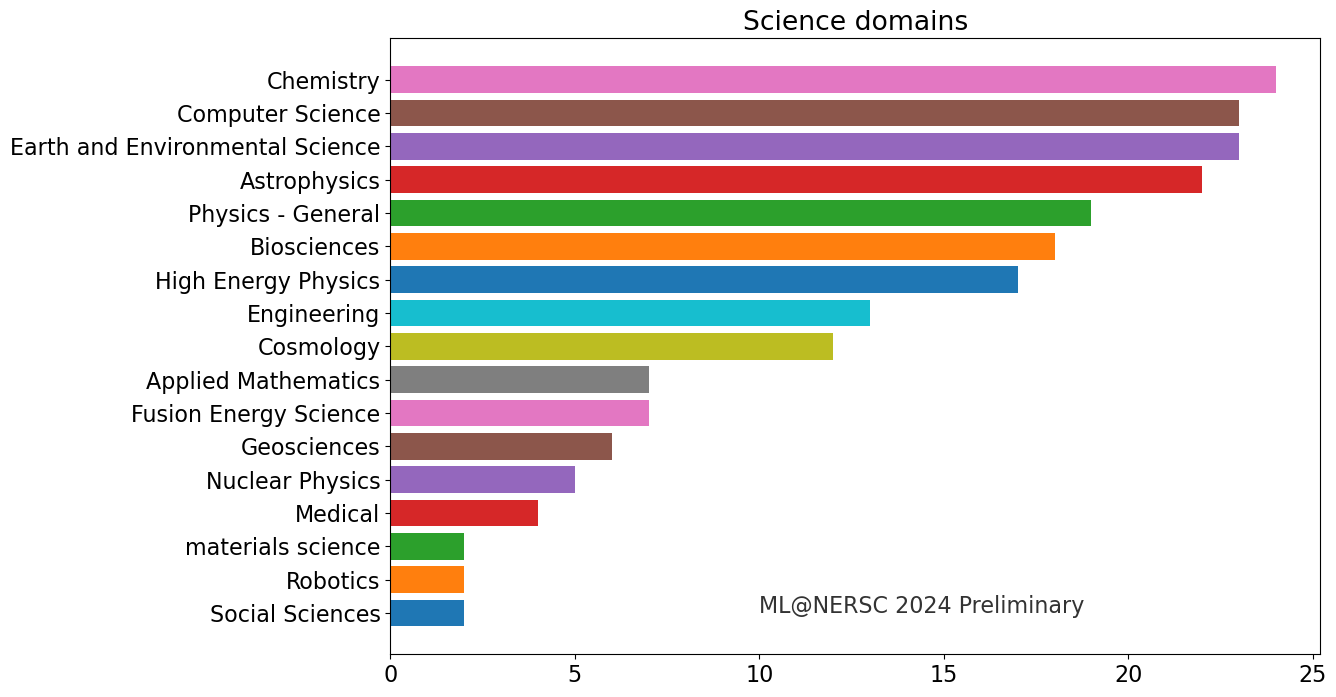

In [19]:
# Throw out rare responses
domain_counts = domain_counts[domain_counts > 1]

# Make the plot
fig, ax = plt.subplots(figsize=(12,8))

ax.barh(domain_counts.index, domain_counts, color=colors)
ax.set_title('Science domains')
ax.text(10, 0, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## How does ML fit into your scientific workflow(s)?

In [16]:
data.columns[18]

'How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own description, include future plans)'

In [17]:
responses = data.iloc[:,18]

workflows = split_multi_response(responses)

# Simplify labels
workflows = workflows.str.replace(
    'Coupled ML+simulation (e.g. replacing DFT in a simulation loop)',
    'Coupled ML+simulation', regex=False)
workflows = workflows.str.replace(
    'Entire ML replacement of simulation',
    'ML replacing simulation')
workflows = workflows.str.replace(
    'ML for real-time ("online") experimental data',
    'ML for real-time experimental data', regex=False)
workflows = workflows.str.replace(
    'ML for real-time control of scientific instrument',
    'ML for control of scientific instrument')

workflow_counts = workflows.value_counts(ascending=True)
workflow_counts

How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own description, include future plans)
usually as a comparative method to some other statistical method                        1
ML for pattern recognition                                                              1
simulation                                                                              1
ML integration into an experimental workflow (drive more effective experimentation)     1
RAG                                                                                     1
Classify experimental particle collision data from ATLAS experiment                     1
ML to optimize input parameters for optic shape                                         1
ML for control of scientific instrument                                                11
ML for real-time experimental data                                                     23
ML replacing simula

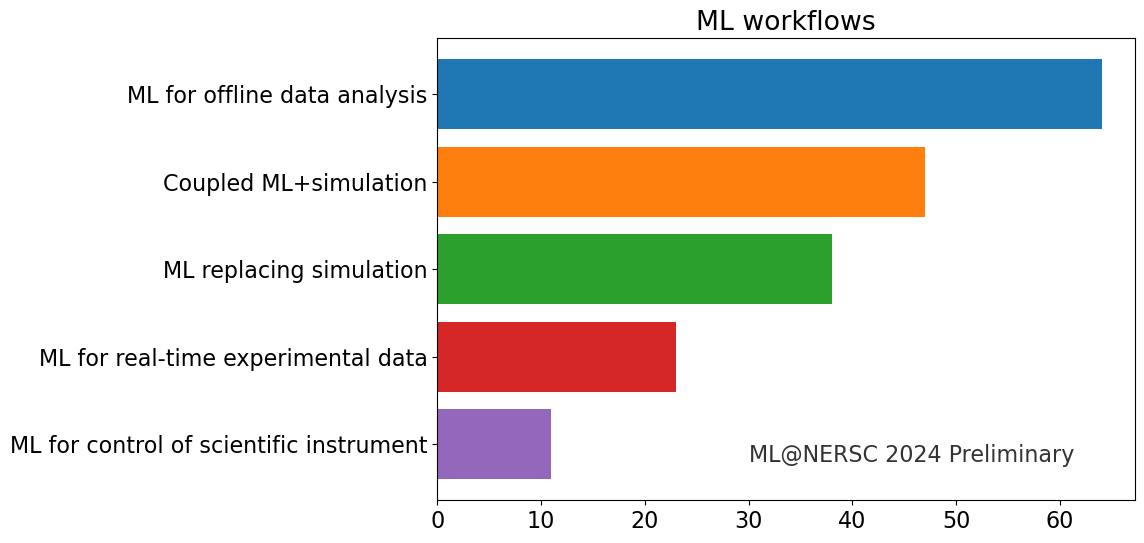

In [21]:
# Filter rare responses
workflow_counts = workflow_counts[workflow_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(workflow_counts.index, workflow_counts, color=colors[:len(workflow_counts)][::-1])
ax.set_title('ML workflows')
ax.text(30, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What frameworks/tools are you using?

In [25]:
responses = data.iloc[:,5]
frameworks = split_multi_response(responses)

In [26]:
# Data cleanup, merging
frameworks[frameworks.str.contains('Flux')] = 'Flux'
frameworks[frameworks.str.contains('jax|flax|haiku', case=False)] = 'JAX'
frameworks[frameworks.str.contains('matlab', case=False)] = 'Matlab'

In [27]:
# Get unique response counts
framework_counts = frameworks.value_counts(ascending=True)
framework_counts

What frameworks/tools are you using?
FourCastNet                                                                                               1
HuggingFace                                                                                               1
Nvidia Triton                                                                                             1
RDKit                                                                                                     1
YOLO                                                                                                      1
LBANN                                                                                                     1
User of the VASP on-the-fly ML and DeePMD                                                                 1
xgboost                                                                                                   1
Ray                                                                                                

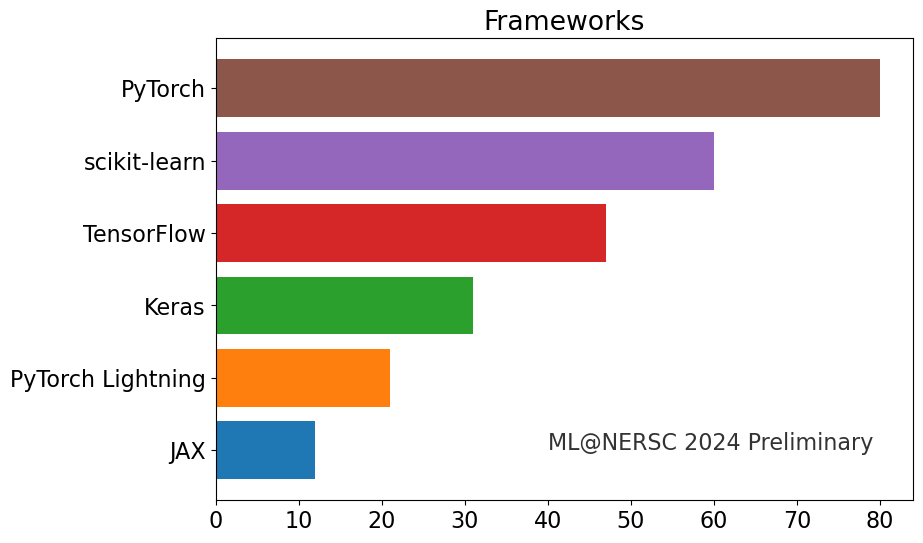

In [29]:
# Filter out rare responses
framework_counts = framework_counts[framework_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(framework_counts.index, framework_counts, color=colors)
ax.set_title('Frameworks')
ax.text(40, 0, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What types of ML tasks do you employ?

In [30]:
responses = data.iloc[:,20]
tasks = split_multi_response(responses)
tasks = tasks.str.replace('Unsupervised / self-supervised learning / clustering', 'Unsupervised / self-supervised')
task_counts = tasks.value_counts(ascending=True)
task_counts

What types of ML tasks do you employ?
model emulation                     1
Evolutionary algorithms             1
Reinforcement learning             13
Segmentation / object detection    25
Generative modeling                46
Classification                     61
Unsupervised / self-supervised     61
Regression                         72
Name: count, dtype: int64

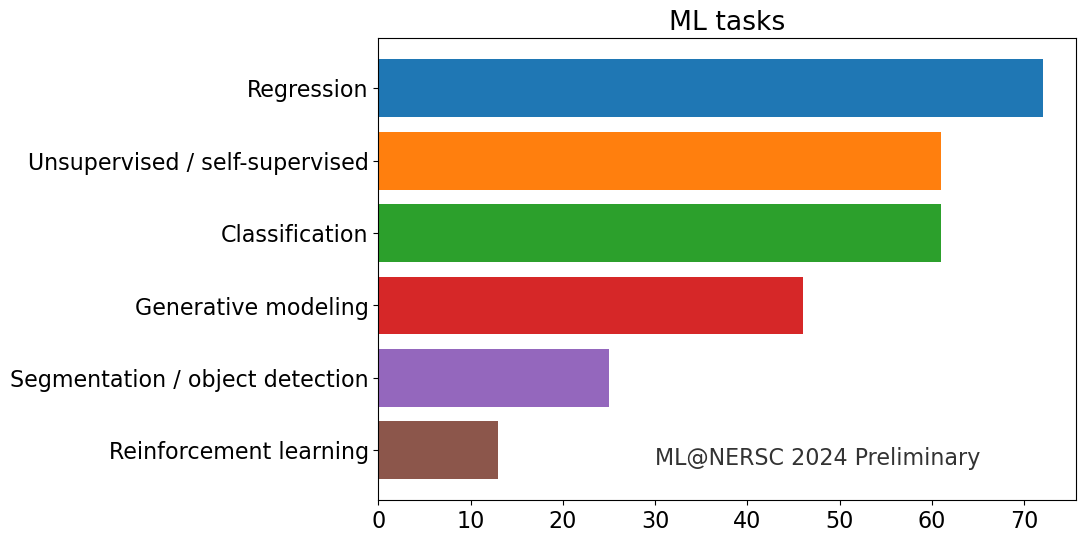

In [33]:
# Filter rare responses
task_counts = task_counts[task_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(task_counts.index, task_counts, color=colors[:len(task_counts)][::-1])
ax.set_title('ML tasks')
ax.text(30, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What types of models are you using?

In [45]:
responses = data.iloc[:,21]

In [46]:
responses[3]

'Fully-connected / feed-forward Neural Networks (MLPs), heteroskedastic regression'

In [47]:
# Simplify responses before splitting (e.g. to remove commas)
rename_map = {
    'Traditional ML models (SVM, Random Forest, Decision Trees, Ensemble Methods, etc)': 'Traditional ML',
    'Fully-connected / feed-forward Neural Networks (MLPs)': 'Fully-connected Neural Networks',
    'Convolutional Neural Networks (CNNs)': 'Convolutional Neural Networks',
    'Recurrent Neural Networks (RNNs, GRUs, LSTMs)': 'Recurrent Neural Networks',
    'Attention models (e.g. Transformer, LLMs, BERT, GPT)': 'Transformers',
    'Graph or point-cloud Neural Networks': 'Graph/Point Neural Networks',
    'Diffusion models (DDPM, EDM, LDM)' : 'Diffusion models',
}

for k,v in rename_map.items():
    responses = responses.str.replace(k, v, regex=False)

In [48]:
models = split_multi_response(responses)

In [51]:
# Additional response cleanup
models[models.str.contains('flow', case=False)] = 'Flow-based models'
models[models.str.contains('gaussian|gpr', case=False)] = 'Gaussian Processes'
models[models.str.contains('equivariant|graph', case=False)] = 'Graph/Point Neural Networks'

In [52]:
model_counts = models.value_counts(ascending=True)
model_counts

What types of models are you using? (include current and future plans)
heteroskedastic regression                  1
Variational Autoencoders                    1
Autoencoder and Variational Autoencoder     1
Gaussian Processes                          2
Diffusion models                           26
Recurrent Neural Networks                  29
Graph/Point Neural Networks                36
Transformers                               50
Traditional ML                             54
Convolutional Neural Networks              58
Fully-connected Neural Networks            60
Name: count, dtype: int64

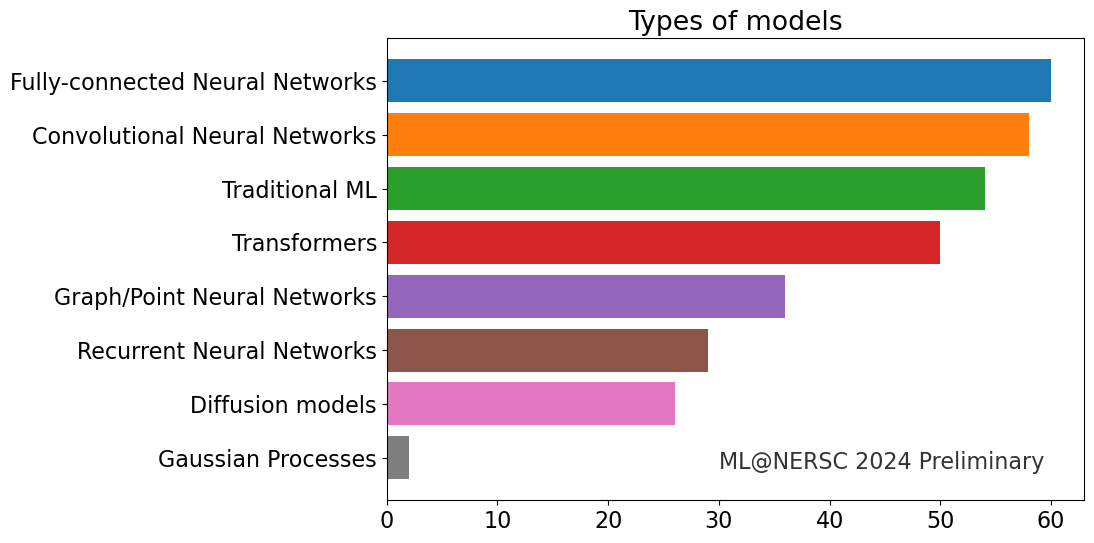

In [54]:
# Filter rare responses
model_counts = model_counts[model_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(model_counts.index, model_counts, color=colors[:len(model_counts)][::-1])
ax.set_title('Types of models')
ax.text(30, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## HPO

In [55]:
data.columns[23]

'Which hyperparameter optimization libraries are you using, if any?'

In [56]:
hpo = data.iloc[:,23]

In [57]:
hpo = split_multi_response(hpo)

In [58]:
hpo_counts = hpo.value_counts(ascending=True)
hpo_counts

Which hyperparameter optimization libraries are you using, if any?
HyperTuning.jl                                                                                                    1
NVIDIA Modulus                                                                                                    1
Adaptive Experimentation Platform (https://ax.dev/) through Hydra (https://hydra.cc/docs/plugins/ax_sweeper/)     1
DeepHyper                                                                                                         1
Pseudo-random grid search coded in python                                                                         1
RayTune                                                                                                           5
Optuna                                                                                                            9
scikit-learn hpo tools                                                                                           15
Keras

## How long does (or would) it take to train your models on a single device?

In [59]:
data.columns[24]

'How long does (or would) it take to train your models on a single device?'

In [60]:
responses = data.iloc[:,24]
traintime = split_multi_response(responses)

In [61]:
time_counts = traintime.value_counts(ascending=True)
time_counts

How long does (or would) it take to train your models on a single device?
It depends on the complexity of the model and problem. some models could take days and weeks to be fully trained     1
Depends how big it is                                                                                                1
A few hours for one model                                                                                            1
but I need to train thousands of models                                                                              1
Months                                                                                                              12
Weeks                                                                                                               25
Minutes                                                                                                             31
Days                                                                                         

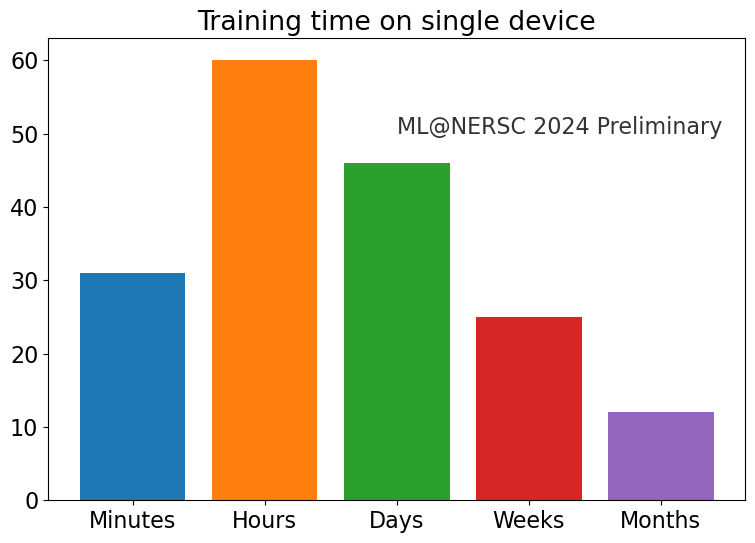

In [65]:
time_x = ['Minutes', 'Hours', 'Days', 'Weeks', 'Months'] #, 'Years']
time_y = time_counts[time_x]

# Make the plot
fig, ax = plt.subplots()

ax.bar(time_x, time_y, color=colors)
ax.set_title('Training time on single device')
ax.text(2, 50, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## Do you use or plan to use distributed training?

In [66]:
data.columns[25]

'Do you use or plan to use distributed training?'

In [67]:
responses = data.iloc[:,25]
responses

0      Data parallelism, Model parallelism, Pipeline ...
1          Hybrid parallelism (combination of the above)
2                                       Data parallelism
3                                   Pipeline parallelism
4                                      Model parallelism
                             ...                        
102                  Data parallelism, Model parallelism
103        Hybrid parallelism (combination of the above)
104    I don't need distributed training (single node...
105    I don't need distributed training (single node...
106    Data parallelism, Model parallelism, Pipeline ...
Name: Do you use or plan to use distributed training?, Length: 107, dtype: object

In [68]:
distmodes = split_multi_response(responses)

# Simplify some of the labels here
distmodes = distmodes.str.replace(
    'Hybrid parallelism (combination of the above)',
    'Hybrid parallelism', regex=False)
distmodes = distmodes.str.replace(
    "I don't need distributed training (single node or device is sufficient)",
    "Not needed", regex=False)

In [69]:
dist_counts = distmodes.value_counts(ascending=True)
dist_counts

Do you use or plan to use distributed training?
Not sure.                                                                        1
I use Dask to support concurrent fitness evaluations for deep learner models     1
Pipeline parallelism                                                            19
Hybrid parallelism                                                              23
Not needed                                                                      26
Model parallelism                                                               40
Data parallelism                                                                55
Name: count, dtype: int64

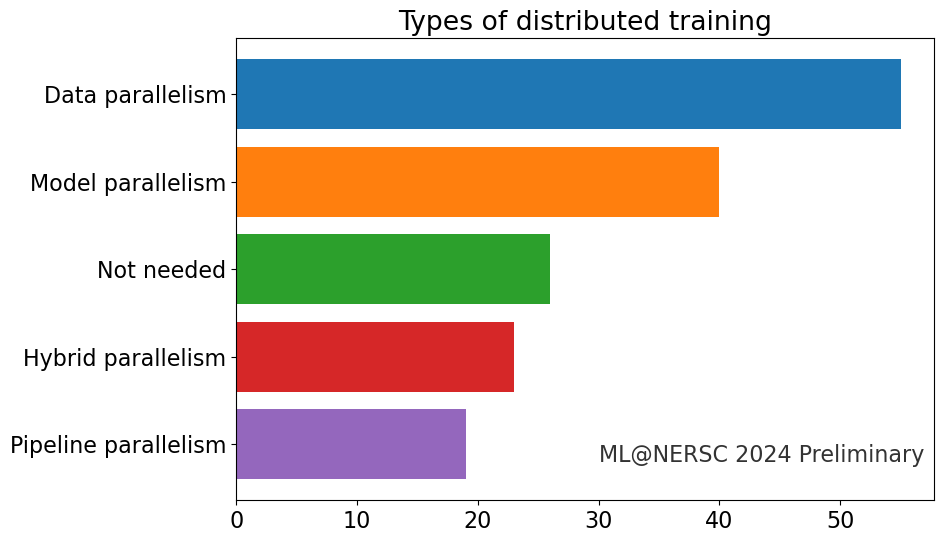

In [71]:
# Filter rare responses
dist_counts = dist_counts[dist_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(dist_counts.index, dist_counts, color=colors[:len(dist_counts)][::-1])
ax.set_title('Types of distributed training')
ax.text(30, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## Which distributed training libraries do you use?

In [72]:
data.columns[26]

'Which (if any) distributed training libraries do you use?'

In [73]:
distlibs = data.iloc[:,26]

# Simplify some labels
distlibs = distlibs.str.replace(
    'Framework built-in libraries (tensorflow.distributed, pytorch DistributedDataParallel)',
    'Framework built-in',
    regex=False
)

distlibs = split_multi_response(distlibs)

# Combine some bins
distlibs[distlibs.str.contains('mpi', case=False)] = 'MPI'
distlibs[distlibs.str.contains('Distributed.jl')] = 'Framework built-in'

In [74]:
distlibs_counts = distlibs.value_counts(ascending=True)
distlibs_counts

Which (if any) distributed training libraries do you use?
ColossalAI              1
Megatron-LM             1
NeMo                    3
Ray SGD / Ray Train     5
Horovod                 8
DeepSpeed              11
Framework built-in     48
Name: count, dtype: int64

In [75]:
# Filter rare responses
#distlibs_counts = distlibs_counts[distlibs_counts > 1]

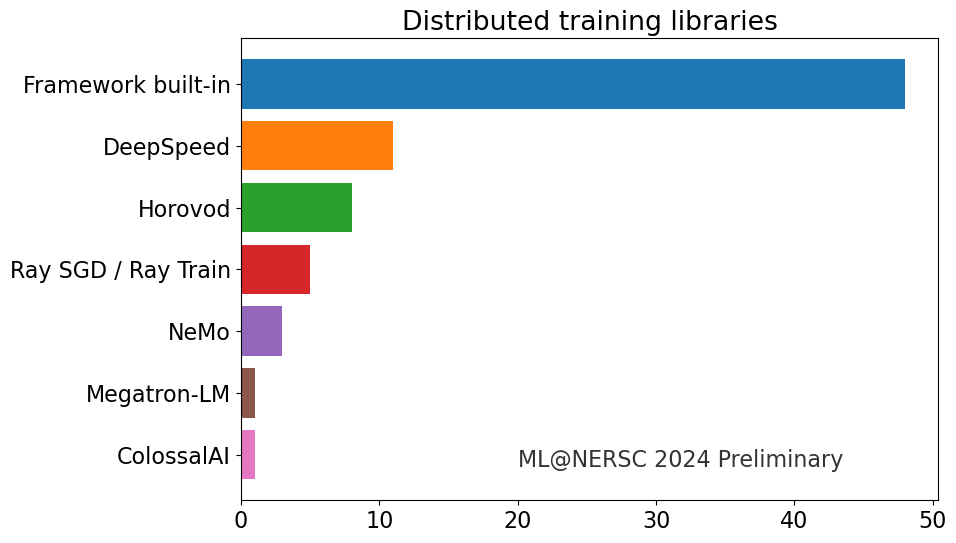

In [77]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(distlibs_counts.index, distlibs_counts, color=colors[:len(distlibs_counts)][::-1])
ax.set_title('Distributed training libraries')
ax.text(20, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## On how many devices do you typically train a model?

In [78]:
data.columns[27]

'On how many devices do you typically train a model?'

In [79]:
responses = data.iloc[:,27]
trainscale = split_multi_response(responses)
trainscale_counts = trainscale.value_counts(ascending=False)
trainscale_counts

On how many devices do you typically train a model?
Single    66
2-8       45
10s       18
100s      12
1000s      2
Name: count, dtype: int64

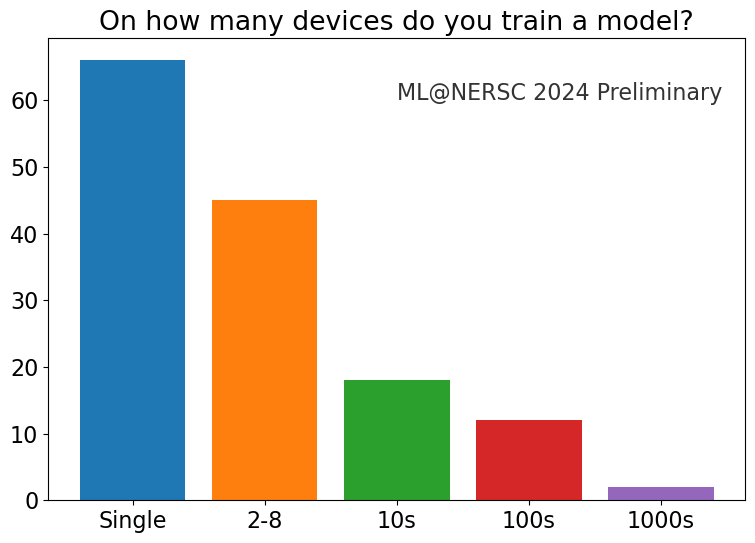

In [83]:
# Make the plot
fig, ax = plt.subplots()

ax.bar(trainscale_counts.index, trainscale_counts, color=colors)
ax.set_title('On how many devices do you train a model?')
ax.text(2, 60, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What sizes are your training datasets?

In [84]:
data.columns[32]

'What sizes are your training datasets?'

In [85]:
responses = data.iloc[:,32]
datasizes = split_multi_response(responses)
datasizes

0      100s of GB
0         1-10 TB
1      100s of GB
2      100s of GB
3       10s of GB
          ...    
106     10s of GB
106    100s of GB
106       1-10 TB
106     10s of TB
106       >100 TB
Name: What sizes are your training datasets?, Length: 195, dtype: object

In [86]:
datasize_counts = datasizes.value_counts()

In [87]:
datasize_counts.index

Index(['Up to 10 GB', '100s of GB', '10s of GB', '1 GB or less', '1-10 TB',
       '10s of TB', '>100 TB'],
      dtype='object', name='What sizes are your training datasets?')

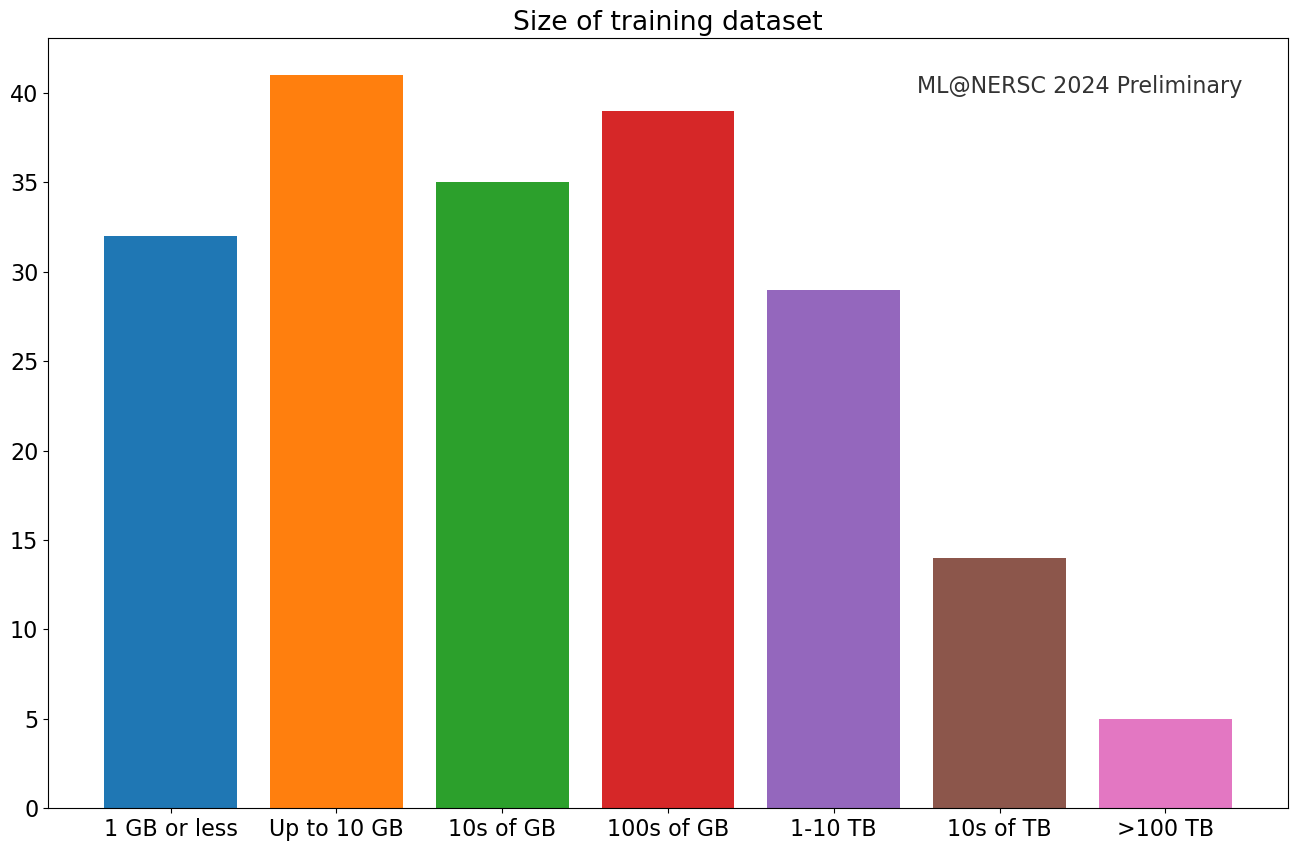

In [90]:
datasize_x = ['1 GB or less', 'Up to 10 GB', '10s of GB',
              '100s of GB', '1-10 TB', '10s of TB', '>100 TB']
datasize_y = datasize_counts[datasize_x]

# Make the plot
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(datasize_x, datasize_y, color=colors)
ax.set_title('Size of training dataset')
ax.text(4.5, 40, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What ML software do you use at NERSC?

In [92]:
data.columns[34]

'What ML software installation setup do you use at NERSC (if relevant)?'

In [93]:
softwares = data.iloc[:,34]

# Simplify some labels
softwares = softwares.str.replace(
    'NERSC modules (TensorFlow, PyTorch, Anaconda)',
    'NERSC modules',
    regex=False
).str.replace(
    'Prebuilt binaries (conda, pip, etc)',
    'Prebuilt binaries',
    regex=False
)

softwares = split_multi_response(softwares)

In [94]:
softwares

0          NERSC modules
0      Prebuilt binaries
2          NERSC modules
2      Prebuilt binaries
4      Build from source
             ...        
103    Prebuilt binaries
103           Containers
104        NERSC modules
106        NERSC modules
106    Prebuilt binaries
Name: What ML software installation setup do you use at NERSC (if relevant)?, Length: 150, dtype: object

In [95]:
sw_counts = softwares.value_counts(ascending=True)
sw_counts

What ML software installation setup do you use at NERSC (if relevant)?
Looking to migrate workload to NERSC     1
Build from source                       18
Containers                              18
Prebuilt binaries                       56
NERSC modules                           57
Name: count, dtype: int64

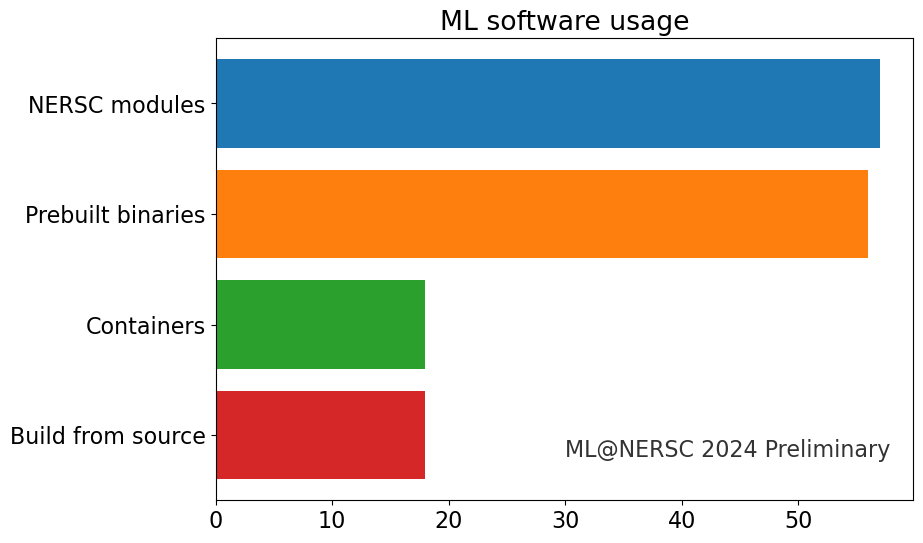

In [97]:
# Filter rare responses
sw_counts = sw_counts[sw_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(sw_counts.index, sw_counts, color=colors[:len(sw_counts)][::-1])
ax.set_title('ML software usage')
ax.text(30, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);